In [2]:
from azure.identity import DefaultAzureCredential
from azure.ai.ml import MLClient, Input, command
from azure.ai.ml.dsl import pipeline
from azure.ai.ml.entities import PipelineJob
from azure.ai.ml.constants import AssetTypes
import os


In [7]:
from azureml.core import Workspace

ws = Workspace(
    subscription_id="52d318a4-61df-4879-a6d2-4a078599d15e",
    resource_group="neuverra-rg",
    workspace_name="neuverra-ml-ws"
)


In [1]:
from azureml.core import Dataset

# Get the registered dataset by name and version
dataset = Dataset.get_by_name(ws, name="automl_marketing_df", version=1)

# Convert to pandas DataFrame
df = dataset.to_pandas_dataframe()

# Quick preview
df.head()


NameError: name 'ws' is not defined

In [1]:
from azureml.core import Workspace

ws = Workspace(
    subscription_id="52d318a4-61df-4879-a6d2-4a078599d15e",
    resource_group="neuverra-rg",
    workspace_name="neuverra-ml-ws"
)


In [2]:
from azureml.core import Dataset

# Get the registered dataset by name
dataset = Dataset.get_by_name(ws, name="automl_marketing_df", version=1)

# Convert to pandas DataFrame
df = dataset.to_pandas_dataframe()

# Quick preview
df.head()


{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}


,campaign_id,channel,objective,target_audience,launch_date,impressions,conversions,open_rate,click_through_rate,conversion_rate,pipeline_value_generated,AI_score,success_flag
0,d856ca23-a6e7-4ae6-b0b7-479433361273,Account-Based Marketing (ABM),Product Launch,Healthcare,2022-11-11,19065,16964,15.55,1.33,88.98,50000,225.6,0
1,cabe9725-0225-4b06-9225-c1be87021a4e,Account-Based Marketing (ABM),Promote New Product,Manufacturing,2022-12-27,7039,6197,39.09,2.21,88.04,60000,137.0,1
2,b26a281e-bfb3-4c1a-9454-48325c4bc53f,Account-Based Marketing (ABM),Event Promotion,Retail,2023-01-10,6716,5411,33.25,3.70,80.57,300000,200.2,1
3,208743bf-3dcd-44e1-98c8-a799c39fc75e,Account-Based Marketing (ABM),Promote New Product,Manufacturing,2023-06-16,4527,3969,38.18,6.64,87.67,600000,263.5,1
4,2f6a9040-e2a3-41d7-897d-4fecb0fd3ff3,Account-Based Marketing (ABM),Brand Awareness,Manufacturing,2023-08-26,4292,3540,36.84,6.96,82.48,420000,246.4,1


In [3]:
# Basic structure
df.shape, df.columns

# Data types and non-null counts
df.info()

# Quick stats
df.describe(include='all').T


/tmp/ipykernel_6515/314843475.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
campaign_id,74,74,d856ca23-a6e7-4ae6-b0b7-479433361273,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel,74,10,Channel Partner Marketing,8,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
objective,74,12,Product Launch,15,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target_audience,74,6,Healthcare,20,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
launch_date,74,71,2024-07-28 00:00:00,2,2022-03-13,2025-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
impressions,74.0,NaN,NaN,NaN,NaT,NaT,9350.810811,5817.856313,269.0,4574.25,9145.0,14648.75,19903.0
conversions,74.0,NaN,NaN,NaN,NaT,NaT,7973.445946,4955.681328,222.0,3960.0,7786.0,12323.0,17547.0
open_rate,74.0,NaN,NaN,NaN,NaT,NaT,25.066622,9.133133,10.17,17.015,25.47,33.23,39.61
click_through_rate,74.0,NaN,NaN,NaN,NaT,NaT,4.043649,2.151759,0.55,2.3025,3.935,5.655,7.89
conversion_rate,74.0,NaN,NaN,NaN,NaT,NaT,85.44027,2.938514,80.37,82.89,85.635,88.025,89.88


In [4]:
# Total nulls per column
df.isnull().sum()

# Percentage of nulls per column
(df.isnull().sum() / len(df)) * 100


campaign_id                 0.0
channel                     0.0
objective                   0.0
target_audience             0.0
launch_date                 0.0
impressions                 0.0
conversions                 0.0
open_rate                   0.0
click_through_rate          0.0
conversion_rate             0.0
pipeline_value_generated    0.0
AI_score                    0.0
success_flag                0.0
dtype: float64

In [6]:
# Distribution of the target variable
df['success_flag'].value_counts()

# Basic stats on success
df['success_flag'].describe()


count    74.000000
mean      0.810811
std       0.394332
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: success_flag, dtype: float64

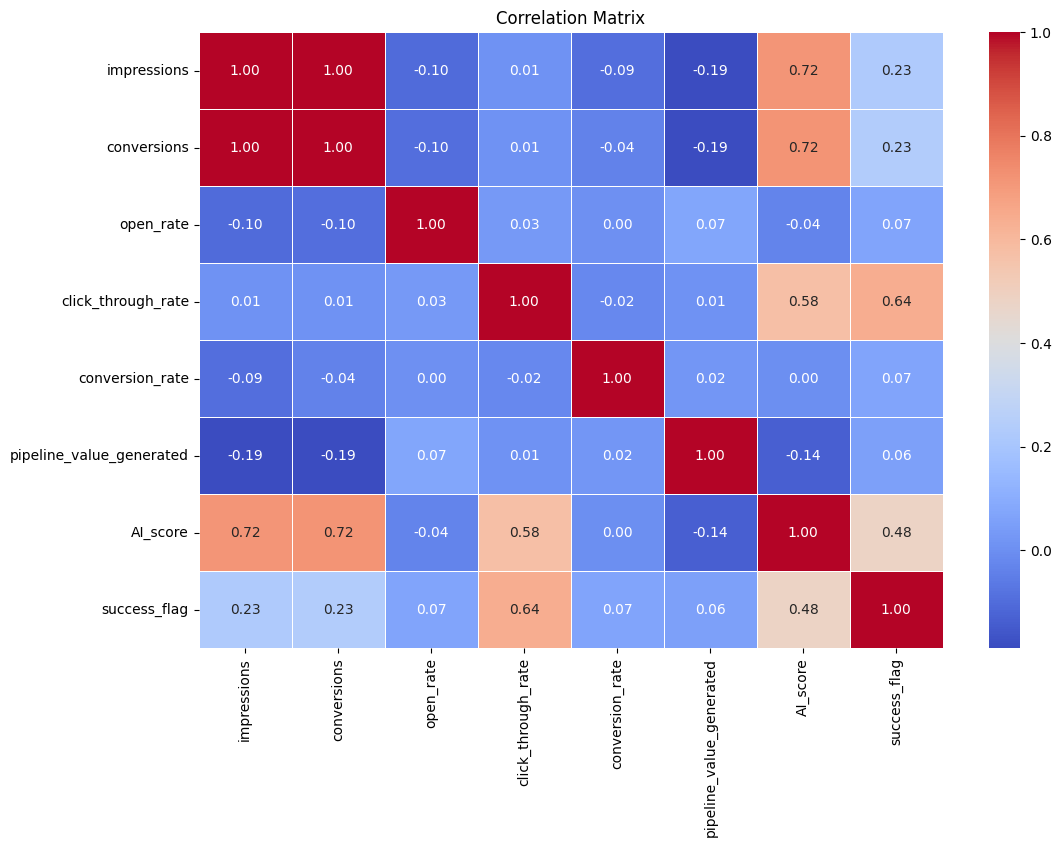

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(12, 8))

# Only include numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlation matrix
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


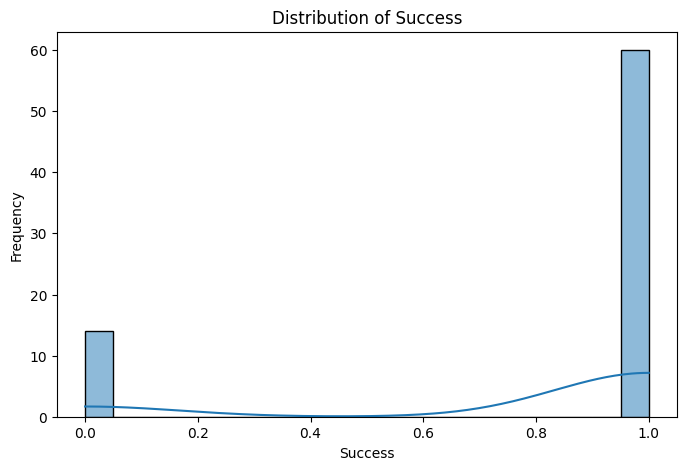

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['success_flag'], kde=True, bins=20)
plt.title('Distribution of Success')
plt.xlabel('Success')
plt.ylabel('Frequency')
plt.show()


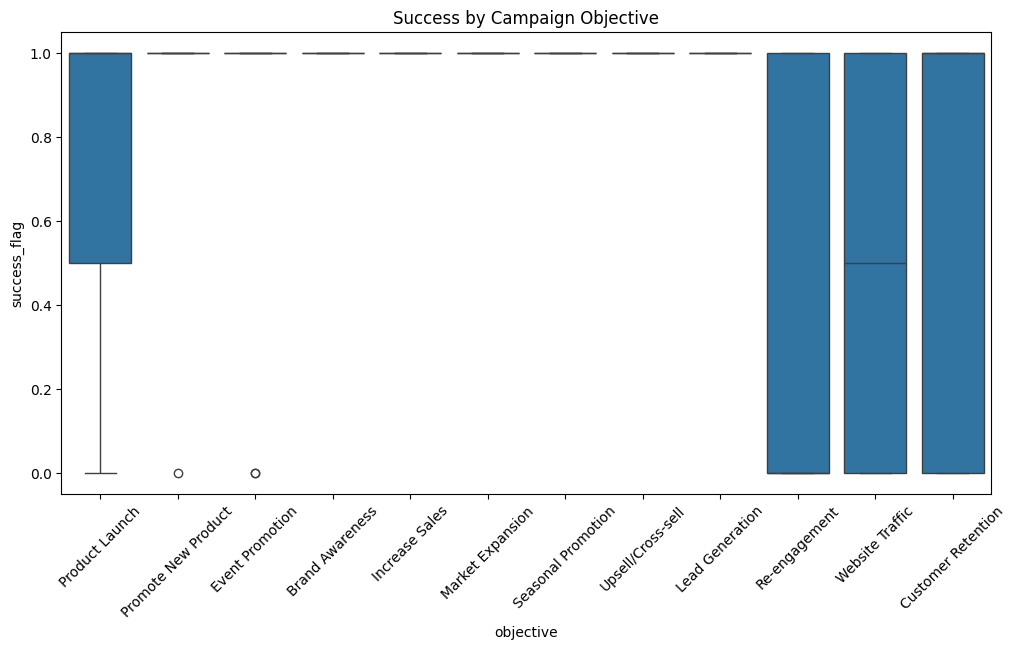

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='objective', y='success_flag', data=df)
plt.xticks(rotation=45)
plt.title('Success by Campaign Objective')
plt.show()


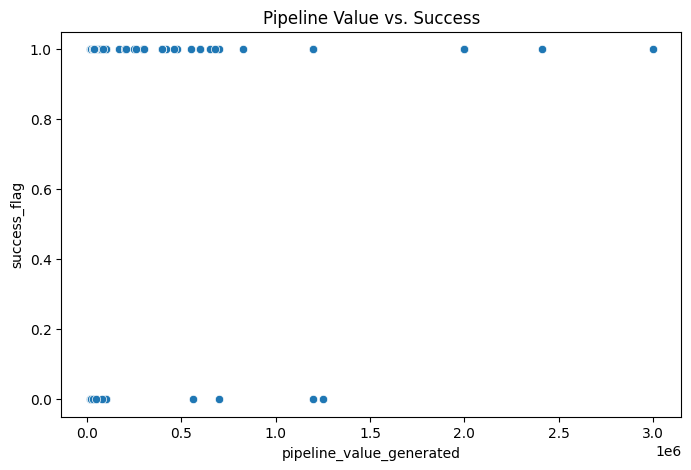

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='pipeline_value_generated', y='success_flag', data=df)
plt.title('Pipeline Value vs. Success')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features and target
X = df.drop(columns=['success_flag', 'campaign_id', 'launch_date'])  # remove ID/date
y = df['success_flag']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [13]:
from sklearn.ensemble import RandomForestRegressor


In [14]:
# Create model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['impressions', 'conversions',
                                                   'open_rate',
                                                   'click_through_rate',
                                                   'conversion_rate',
                                                   'pipeline_value_generated',
                                                   'AI_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['channel', 'objective',
                                                   'target_audience'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 0.00
R² Score: 1.00


In [16]:
import pandas as pd

new_data = pd.DataFrame({
    'channel': ['Email'],
    'objective': ['Promote New Product'],
    'target_audience': ['Retail'],
    'launch_date': ['2025-08-15'],
    'impressions': [10000],
    'conversions': [800],
    'open_rate': [35.0],
    'click_through_rate': [6.5],
    'conversion_rate': [85.0],
    'pipeline_value_generated': [250000],
    'AI_score': [212.5]
})


In [17]:
# Apply the same preprocessing and model
prediction = model.predict(new_data)

print(f"Predicted success_flag: {prediction[0]:.2f}")


Predicted success_flag: 1.00


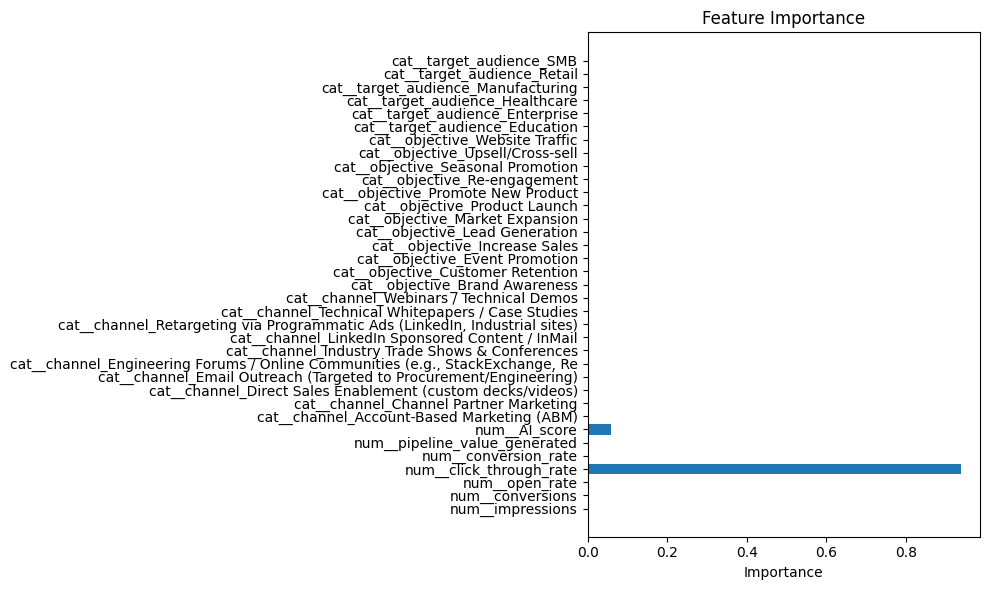

In [18]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = model.named_steps['regressor'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Create bar chart
plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
